# Ejercicio 29-04-2022
# Técnicas de reducción de varianza 
**Variables antitéticas**

Consideremos la estimación de la integral:

 <font color='red'> $$\mathcal{I}=\int_0^1 \frac{1}{1+x} dx$$

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{m} \Big( \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m} \Big)$$

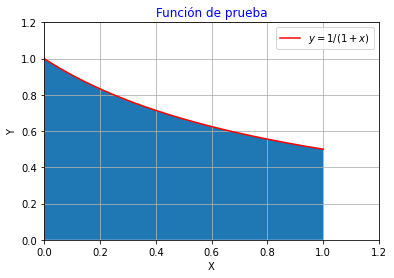

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Definimos la función de prueba.
def funcion(x):
    return 1.0/(1+x) 
    
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.plot(X,funcion(X), color='red', label="$y=1/(1+x)$")
plt.fill_between(X,funcion(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Podemos estimar el valor de esta integral por el método de la media muestral:

$$\mathcal{I} \approx \frac{1}{m} \Big( \frac{1}{1 + u_1} + \frac{1}{1 + u_2} + \frac{1}{1 + u_3} + ... + \frac{1}{1 + u_m} \Big)$$

In [4]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69248
El error estándar es: 0.00253


In [5]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(1-u)
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n), suma

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69448
El error estándar es: 0.00259


In [6]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)

    return np.mean(suma), np.std(suma)/np.sqrt(n)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.69269
El error estándar es: 0.00044


In [7]:
def mc_crudo(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=(funcion(u) + funcion(1-u))/2.0
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral con v antiteticas es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

In [8]:
def mc_crudo1(funcion, n):
    integral=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        y=funcion(u)
        suma.append(y)
        integral.append(np.mean(suma))
        
    print("El valor de la integral es:", round(np.mean(suma),5))
    print("El error estándar es:", round(np.std(suma)/np.sqrt(n),5))
    
    return np.mean(suma), np.std(suma)/np.sqrt(n), integral

El valor de la integral es: 0.69582
El error estándar es: 0.00445
El valor de la integral con v antiteticas es: 0.69372
El error estándar es: 0.00078


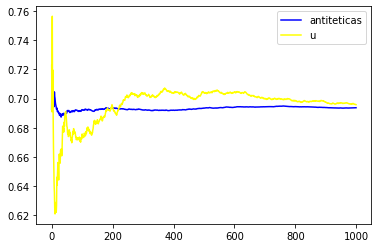

In [20]:
X1=mc_crudo1(funcion, n=1000)[2]
X=mc_crudo(funcion, n=1000)[2]

plt.plot(X, color='blue', label='antiteticas')
plt.plot(X1, color='yellow', label='u')
plt.legend()